In [243]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

In [244]:
df= pd.read_csv("laptops.csv")

In [272]:
df.head(8)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,RTX 2060,15.6,No,1309.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,RTX 2060,15.6,No,599.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,RTX 2060,15.6,No,1089.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1499.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,RTX 2060,15.6,No,969.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1999.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,RTX 2060,14.0,No,1209.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,RTX 2060,15.6,No,1109.01


In [246]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [247]:
nuls=df.dropna().count()[0]

In [248]:
nuls

781

In [249]:
df.count()[0]

2160

In [250]:
clean_df=df.dropna()

In [251]:
clean_df.describe()

,RAM,Storage,Screen,Final Price
count,781.000000,781.000000,781.000000,781.000000
mean,22.822023,888.010243,15.935980,1960.431690
std,11.557896,376.492149,0.871735,1012.765083
min,8.000000,256.000000,13.400000,477.590000
25%,16.000000,512.000000,15.600000,1199.000000
50%,16.000000,1000.000000,15.600000,1699.900000
75%,32.000000,1000.000000,16.100000,2461.210000
max,128.000000,4000.000000,18.000000,7150.470000


In [252]:
clean_df.max()

Laptop          Samsung Galaxy Book3 Ultra Intel Evo Core i9-1...
Status                                                Refurbished
Brand                                                     Samsung
Model                                                     ZenBook
CPU                                             Intel Evo Core i9
RAM                                                           128
Storage                                                      4000
Storage type                                                  SSD
GPU                                                         T 600
Screen                                                       18.0
Touch                                                         Yes
Final Price                                               7150.47
dtype: object

In [253]:
clean_df.min()

Laptop          ASUS  ROG Zephyrus M16 GU604VI-93D47PB1 Intel ...
Status                                                        New
Brand                                                        Acer
Model                                                         14w
CPU                                                  AMD Radeon 9
RAM                                                             8
Storage                                                       256
Storage type                                                  SSD
GPU                                                         610 M
Screen                                                       13.4
Touch                                                          No
Final Price                                                477.59
dtype: object

In [254]:
df.columns

Index(['Laptop', 'Status', 'Brand', 'Model', 'CPU', 'RAM', 'Storage',
       'Storage type', 'GPU', 'Screen', 'Touch', 'Final Price'],
      dtype='object')

In [255]:
clean_df.tail(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
2148,Razer Blade 15 Advanced Model QHD Intel Core i...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,15.6,No,2499.98
2149,Razer Blade 15 Advanced Model QHD Intel Core i...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,15.6,No,2899.99
2150,Razer Blade 15 Advanced Model QHD Intel Core i...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,15.6,No,3299.99
2151,Razer Blade 15 Advanced Model QHD Intel Core i...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,15.6,No,3399.99
2152,Razer Blade 15 Base Model FHD Intel Core i7-10...,Refurbished,Razer,Blade,Intel Core i7,16,512,SSD,RTX 3060,15.6,No,1232.74
2153,Razer Blade 15 Base Model FHD Intel Core i7-10...,Refurbished,Razer,Blade,Intel Core i7,16,512,SSD,RTX 3070,15.6,No,1583.39
2154,Razer Blade 17 4K 144Hz Intel Core i9-12900H/3...,Refurbished,Razer,Blade,Intel Core i9,32,1000,SSD,RTX 3080,17.3,No,4699.99
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99


In [256]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [257]:
df.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1312.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,201.050000
25%,8.000000,256.000000,14.000000,661.082500
50%,16.000000,512.000000,15.600000,1031.945000
75%,16.000000,1000.000000,15.600000,1708.970000
max,128.000000,4000.000000,18.000000,7150.470000


In [258]:
df["GPU"]=df["GPU"].fillna("RTX 2060")
df["Final Price"]+=300 #300 is the price of RTX 2060 GPU

In [259]:
df.head(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,RTX 2060,15.6,No,1309.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,RTX 2060,15.6,No,599.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,RTX 2060,15.6,No,1089.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1499.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,RTX 2060,15.6,No,969.01
5,MSI Crosshair 17 C12VF-264XES Intel Core i7-12...,New,MSI,Crosshair,Intel Core i7,32,1000,SSD,RTX 4060,17.3,No,1999.00
6,Lenovo Thinkpad E14 Gen 4 AMD Ryzen 5 5625U/8G...,New,Lenovo,ThinkPad,AMD Ryzen 5,8,256,SSD,RTX 2060,14.0,No,1209.00
7,ASUS VivoBook 15 F515JA-EJ2882W Intel Core i7-...,New,Asus,VivoBook,Intel Core i7,8,512,SSD,RTX 2060,15.6,No,1109.01
8,Medion Akoya E15415 Intel Core i5-10210U/8GB/2...,New,Medion,Akoya,Intel Core i5,8,256,SSD,RTX 2060,15.6,No,819.00
9,HP Victus 16-d1038ns Intel Core i7-12700H/16GB...,New,HP,Victus,Intel Core i7,16,512,SSD,RTX 3050,16.1,No,1449.00


In [260]:
laptop_clean=df.drop_duplicates(subset=["GPU"])

In [261]:
laptop_clean.tail(10)

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
1219,ASUS ExpertBook B6 Flip B6602FC2-MH0248X Intel...,New,Asus,ExpertBook,Intel Core i7,16,512,SSD,RTX A2000,16.0,Yes,2799.00
1558,Lenovo ThinkPad T15 Gen 2 Intel Core i7-1185G7...,New,Lenovo,ThinkPad,Intel Core i7,16,2000,SSD,MX 450,15.6,No,2095.00
1655,Millenium AZIR ML3 Intel Core i7-9750H/16GB/50...,New,Millenium,AZIR,Intel Core i7,16,500,SSD,RTX 2070,15.6,No,2612.71
1788,Asus ROG Zephyrus G14 GA402RK-L8150W AMD Ryzen...,Refurbished,Asus,ROG,AMD Ryzen 9,32,1000,SSD,RX 6800S,14.0,No,3099.00
1789,Asus ROG Zephyrus S17 GX701LXS-HG032T Intel Co...,Refurbished,Asus,ROG,Intel Core i7,32,1000,SSD,RTX 2080,17.3,No,2092.89
1896,HP OMEN 15-DC0005NS Intel Core i7-8750H/8GB/1T...,Refurbished,HP,Omen,Intel Core i7,8,1000,NaN,GTX 1050,15.6,No,1084.69
1913,HP Pavilion Laptop 14-CE3008NS Intel Core i5-1...,Refurbished,HP,Pavilion,Intel Core i5,8,512,SSD,MX 130,14.0,No,865.54
1974,Lenovo ThinkPad P52s Intel Core i7-8550U/8GB/2...,Refurbished,Lenovo,ThinkPad,Intel Core i7,8,256,SSD,P 500,15.6,No,1177.63
2014,MSI Delta 15 A5EFK-011XES AMD Ryzen 9 5900HX/1...,Refurbished,MSI,Delta,AMD Ryzen 9,16,1000,SSD,RX 6700M,15.6,No,1999.00
2144,Portátil Gaming Gigabyte Aero 15X V8 Intel Cor...,Refurbished,Gigabyte,Aero,Intel Core i7,16,512,SSD,GTX 1070,15.6,No,1348.99


In [262]:
df['GPU'].unique()

array(['RTX 2060', 'RTX 3050', 'RTX 4060', 'RTX 4050', 'RTX 3060',
       'RTX 4070', 'RTX 2050', 'GTX 1650', 'RTX 3070', '610 M',
       'RTX 4080', 'RX 6500M', 'MX 550', 'RTX 3080', 'RTX 4090',
       'RX 7600S', 'A 370M', 'GTX 1660', 'RTX A1000', 'RTX 3000',
       'T 1200', 'Radeon Pro 5300M', 'A 730M', 'Radeon Pro RX 560X',
       'RTX A5500', 'Radeon Pro 5500M', 'T 500', 'T 550', 'RTX A3000',
       'T 2000', 'T 600', 'T 1000', 'Radeon RX 6600M', 'MX 330',
       'RTX A2000', 'MX 450', 'RTX 2070', 'RX 6800S', 'RTX 2080',
       'GTX 1050', 'MX 130', 'P 500', 'RX 6700M', 'GTX 1070'],
      dtype=object)

In [263]:
df['GPU'].value_counts().head()

GPU
RTX 2060    1391
RTX 3050     129
RTX 3060     122
RTX 3070      97
RTX 4060      62
Name: count, dtype: int64

<Axes: xlabel='GPU'>

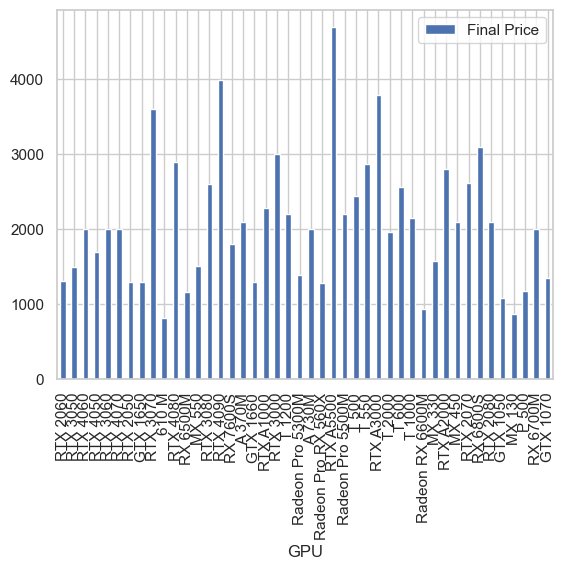

In [264]:
laptop_clean.plot(x='GPU',y="Final Price" ,kind='bar')

In [265]:
num_data = df.select_dtypes(include=['float', 'int'])  # Select numerical columns
cat_data = df.select_dtypes(include=['object', 'category'])  # Select categorical columns


In [266]:
num_data.describe()

,RAM,Storage,Screen,Final Price
count,2160.000000,2160.000000,2156.000000,2160.000000
mean,15.413889,596.294444,15.168112,1612.638509
std,9.867815,361.220506,1.203329,911.475417
min,4.000000,0.000000,10.100000,501.050000
25%,8.000000,256.000000,14.000000,961.082500
50%,16.000000,512.000000,15.600000,1331.945000
75%,16.000000,1000.000000,15.600000,2008.970000
max,128.000000,4000.000000,18.000000,7450.470000


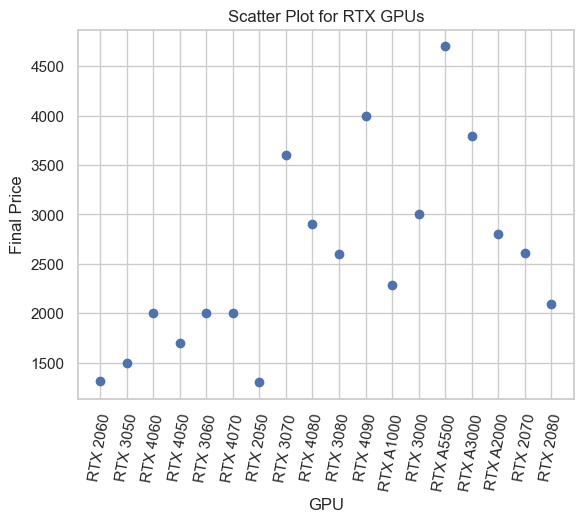

In [267]:
rtx_data = laptop_clean[laptop_clean['GPU'].str.startswith('RTX')]
plt.scatter(rtx_data['GPU'], rtx_data['Final Price'])
plt.xlabel('GPU')
plt.ylabel('Final Price')
plt.title('Scatter Plot for RTX GPUs')
plt.xticks(rotation=80)  
plt.show()

<Axes: xlabel='RAM', ylabel='Final Price'>

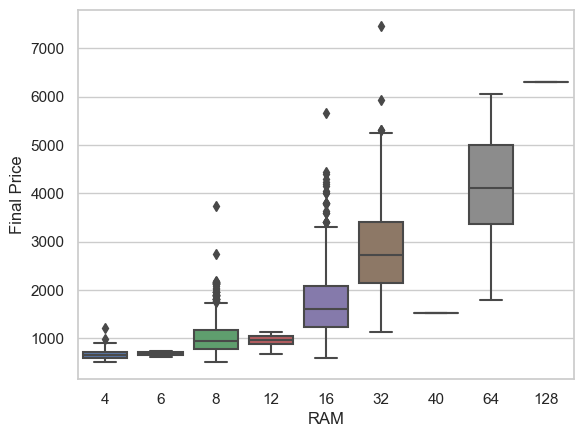

In [268]:
#Seaborn boxplot on RAM X PRICE
sns.boxplot(x=num_data['RAM'],y=num_data['Final Price'])


(0.0, 150.0)

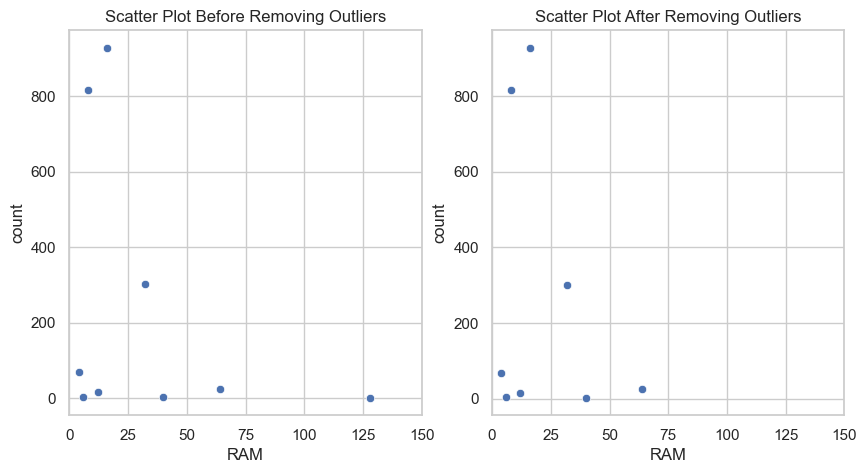

In [327]:
# Calculate quartiles and IQR
Q1 = df['RAM'].quantile(0.25)
Q3 = df['RAM'].quantile(0.75)
IQR = Q3 - Q1

# Calculate bounds for identifying outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['RAM'] < lower_bound) | (df['RAM'] > upper_bound)]

# Create scatter plot before removing outliers
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='RAM', y='count', data=df)
plt.title("Scatter Plot Before Removing Outliers")
plt.xlim(0,150)  

df_no_outliers = df[~((df['RAM'] < lower_bound) | (df['RAM'] > upper_bound))]

plt.subplot(1, 2, 2)
sns.scatterplot(x='RAM', y='count', data=df_no_outliers)
plt.title("Scatter Plot After Removing Outliers")
plt.xlim(0,150)  


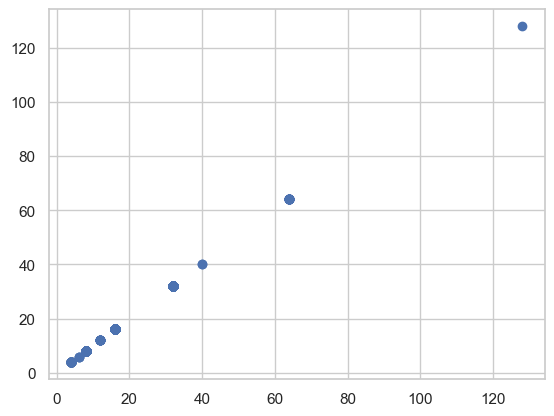

In [313]:
plt.scatter(df['RAM'],df['RAM'])


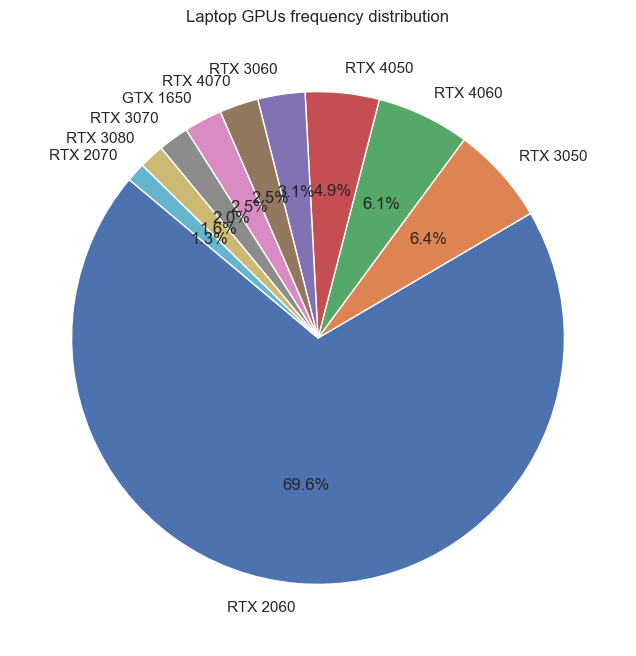

In [278]:
#Show GPUs frequency percentage
gpufreq=cat_data['GPU'].value_counts(normalize=True)
threshold=0.01
gpus_to_remove = gpufreq[gpufreq < threshold].index
filtered_cat = cat_data[~cat_data["GPU"].isin(gpus_to_remove)]


plt.figure(figsize=(8,8))
plt.pie(filtered_cat["GPU"].value_counts(), labels=filtered_cat["GPU"].unique(), autopct='%1.1f%%', startangle=140)

plt.title('Laptop GPUs frequency distribution')
plt.show()

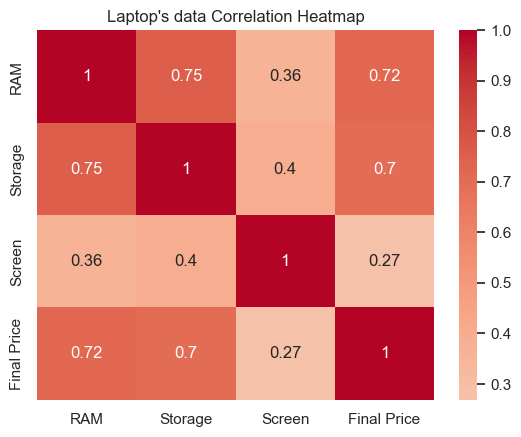

In [280]:
#Show the correlations between numerical data
sns.heatmap(num_data.corr(),annot=True,cmap='coolwarm',center=0)
plt.title("Laptop's data Correlation Heatmap")
plt.show()